# 2-D sections
Advantages: diagonal sections between any points, higher resolution possible, nicer plot

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary librarie
import numpy as np
import matplotlib.pyplot as plt

### Setup the model

In [2]:
geo_model = gp.create_model('Tutorial_ch1-1_Basics')
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [0,2000.,0,2000.,0,2000.],[5,5,5], 
      path_o = os.pardir+"/../data/input_data/tut_chapter1/simple_fault_model_orientations.csv",
      path_i = os.pardir+"/../data/input_data/tut_chapter1/simple_fault_model_points.csv", default_values=True)
gp.map_series_to_surfaces(geo_model,
                            {"Fault_Series":'Main_Fault', 
                             "Strat_Series": ('Sandstone_2','Siltstone',
                                              'Shale', 'Sandstone_1', 'basement')}, remove_unused_series=True)
geo_model.set_is_fault(['Fault_Series'])

Active grids: ['regular']
Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False


### Add sections

pass section dictionary with startpoint, endpoint and resolution for every section:

In [3]:
section_dict = {'section1':([0,0],[2000,2000],[100,80]),
         'section2':([800,0],[800,2000],[150,100]),
         'section3':([0,200],[1500,500],[200,150])} #p1,p2,resolution
geo_model.grid.create_section_grid(section_dict)

,start,stop,resolution,dist
section1,"[0, 0]","[2000, 2000]","[100, 80]",2828.427125
section2,"[800, 0]","[800, 2000]","[150, 100]",2000.000000
section3,"[0, 200]","[1500, 500]","[200, 150]",1529.705854


### Add topography

Active grids: ['regular' 'topography' 'sections']


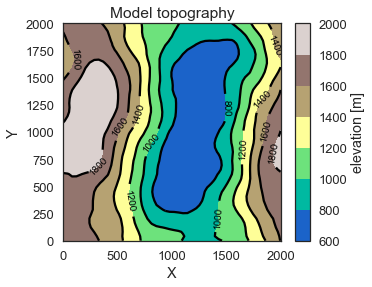

In [4]:
geo_model.set_topography(fd=1.2,d_z=np.array([600,2000]),resolution=np.array([50,50]));

Active grids:

In [5]:
geo_model.grid.grid_types[geo_model.grid.active_grids]

array(['regular', 'topography', 'sections'], dtype='<U10')

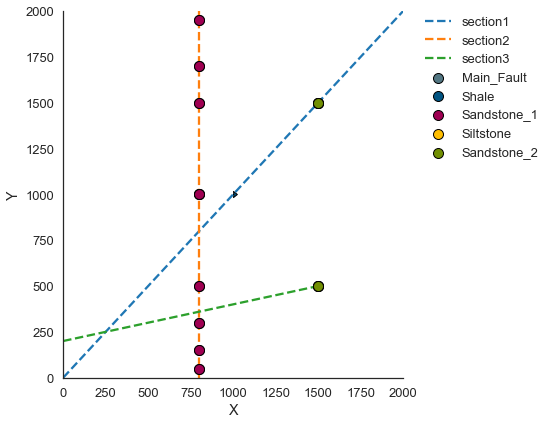

In [6]:
gp.plot.plot_section_traces(geo_model)

In [7]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!


In [8]:
sol = gp.compute_model(geo_model, compute_mesh=False)

64.16619233583219


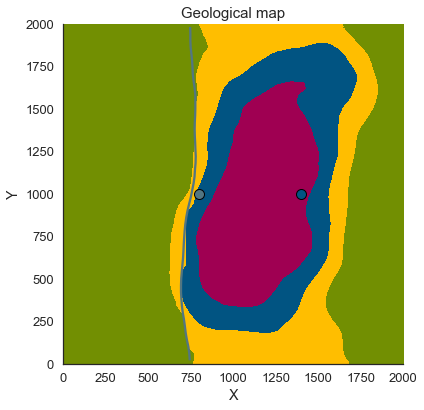

In [9]:
gp.plot.plot_map(geo_model)

../../../gempy/plot/visualization_2d.py:208: UserWarning: the orientations are not converted to apparent dip.
  warnings.warn('the orientations are not converted to apparent dip.')


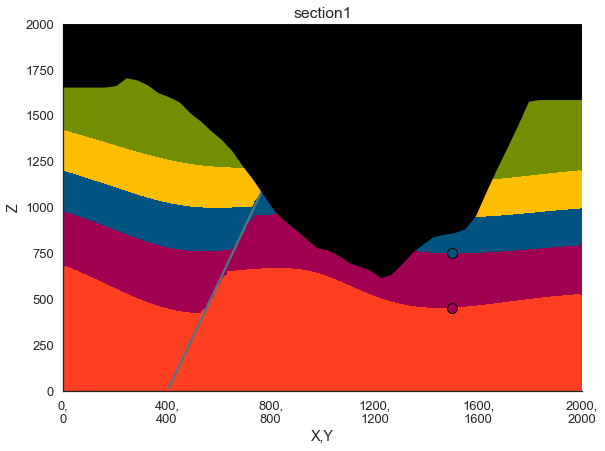

In [10]:
gp.plot.plot_section_by_name(geo_model, 'section1')

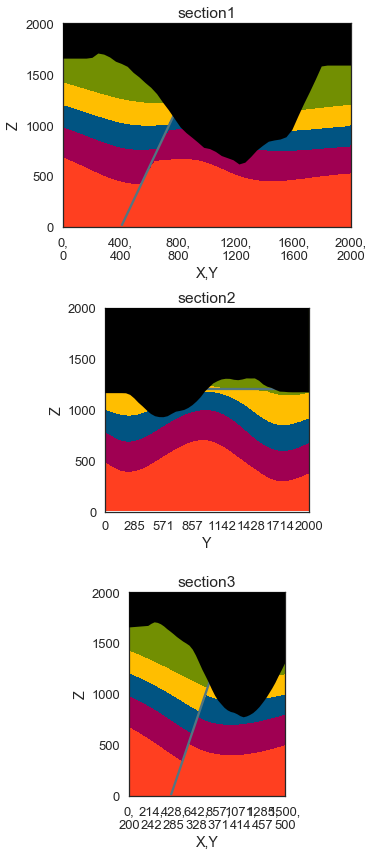

In [11]:
gp.plot.plot_all_sections(geo_model)

### Get polygons of formations in sections

In [12]:
from gempy.utils import section_utils

0.7071067811865475


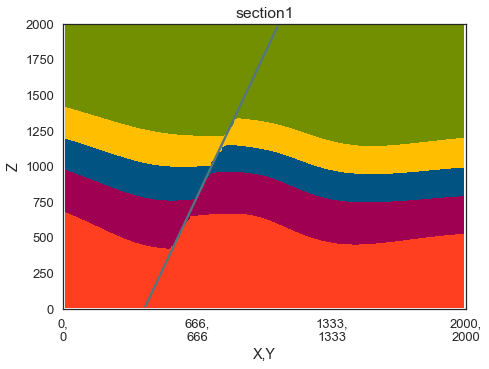

In [13]:
polygondict, cdict, extent = section_utils.get_polygon_dictionary(geo_model, 'section1')

In [14]:
# this stores the xy points in the sections for every surface.
polygondict

{'Main_Fault': [array([[  42.42640687,   12.5       ],
         [  70.71067812,   12.5       ],
         [  98.99494937,   12.5       ],
         [ 127.27922061,   12.5       ],
         [ 155.56349186,   12.5       ],
         [ 183.84776311,   12.5       ],
         [ 212.13203436,   12.5       ],
         [ 240.4163056 ,   12.5       ],
         [ 268.70057685,   12.5       ],
         [ 296.9848481 ,   12.5       ],
         [ 325.26911935,   12.5       ],
         [ 353.55339059,   12.5       ],
         [ 381.83766184,   12.5       ],
         [ 410.12193309,   12.5       ],
         [ 438.40620434,   12.5       ],
         [ 466.69047558,   12.5       ],
         [ 494.97474683,   12.5       ],
         [ 523.25901808,   12.5       ],
         [ 551.54328933,   12.5       ],
         [ 579.82756057,   12.5       ],
         [ 608.11183182,   12.5       ],
         [ 636.39610307,   12.5       ],
         [ 664.68037432,   12.5       ],
         [ 692.96464556,   12.5       ],
  

##### Look at resulting polygons:

In [15]:
form = 'Sandstone_2'
pointslist = np.array(polygondict[form])
c = cdict[form]
if pointslist.shape != ():
    for points in pointslist:
        plt.plot(points[:,0], points[:,1], color=c)
    plt.ylim(extent[2:4])
    plt.xlim(extent[:2])

1.0


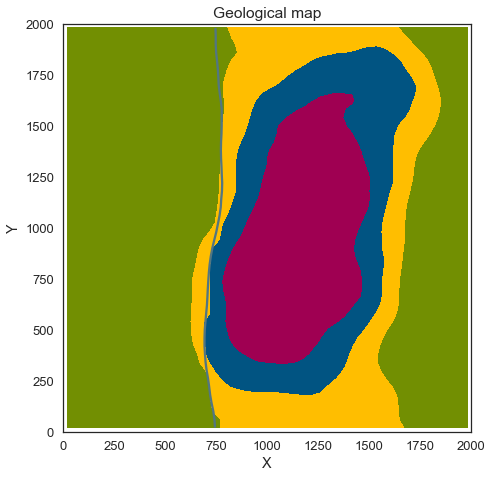

In [16]:
#### The same in geological map
polygondict, cdict, extent = section_utils.get_polygon_dictionary(geo_model, 'topography')

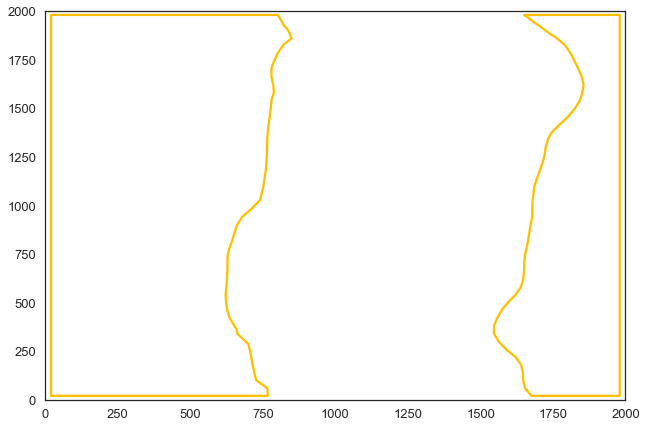

In [17]:
form = 'Siltstone'
pointslist = np.array(polygondict[form])
c = cdict[form]
if pointslist.shape != ():
    for points in pointslist:
        plt.plot(points[:,0], points[:,1], color=c)
    plt.ylim(extent[2:4])
    plt.xlim(extent[:2])